In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df=pd.read_excel('/content/drive/MyDrive/Og_TrainingData_600.xlsx')
df.head(10)

,Depth,Soeed,Class
0,0.0200,1800,1
1,0.0265,1800,1
2,0.0330,1800,1
3,0.0395,1800,1
4,0.0460,1800,1
5,0.0525,1800,1
6,0.0590,1800,1
7,0.0655,1800,1
8,0.0720,1800,1
9,0.0785,1800,1


In [86]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   616 non-null    float64
 1   Soeed   616 non-null    int64  
 2   Class   616 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 14.6 KB


In [88]:
y=pd.DataFrame(data=df['Class']).to_numpy().ravel()
X=df.drop(columns=['Class'])
# X=pd.DataFrame(data=X)
# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# y = encoder.fit_transform(y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [89]:
# X_train=pd.DataFrame(data=X_train,columns=['Depth','Soeed'])
# X_test=pd.DataFrame(data=X_test,columns=['Depth','Soeed'])

In [90]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model=svm.SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7297297297297297

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.43      0.55        69
           1       0.73      0.91      0.81       116

    accuracy                           0.73       185
   macro avg       0.73      0.67      0.68       185
weighted avg       0.73      0.73      0.71       185



In [92]:
C=[]
gamma=[]
x=0.00001
for i in range(11):
  C.append(x)
  gamma.append(x)
  x*=10
print(C)
print(gamma)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': C,
              'gamma': gamma,
              'kernel': ['rbf','linear','sigmoid'],
              'degree': range(1,12)}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, scoring='accuracy', verbose = 3, cv=10)

In [94]:
# model_new=grid.best_estimator_
grid.fit(X_train,y_train)
y_pred2=grid.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(classification_report(y_test,y_pred2))

Streaming output truncated to the last 5000 lines.
[CV 1/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.682 total time=   0.0s
[CV 2/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.628 total time=   0.0s
[CV 3/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.605 total time=   0.0s
[CV 4/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.488 total time=   0.0s
[CV 5/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.651 total time=   0.0s
[CV 6/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.581 total time=   0.0s
[CV 7/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.628 total time=   0.0s
[CV 8/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.674 total time=   0.0s
[CV 9/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;, score=0.651 total time=   0.0s
[CV 10/10] END C=10000.0, degree=7, gamma=10000.0, kernel=sigmoid;,

In [95]:
print(grid.best_params_)

{'C': 10000.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'rbf'}


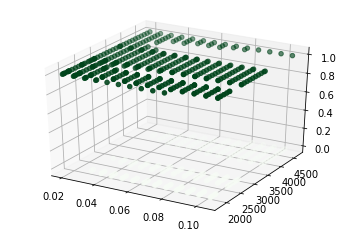

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = df['Class']
# xline = df['Depth']
# yline = df['Soeed']
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = df['Class']
xdata = df['Depth']
ydata = df['Soeed']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

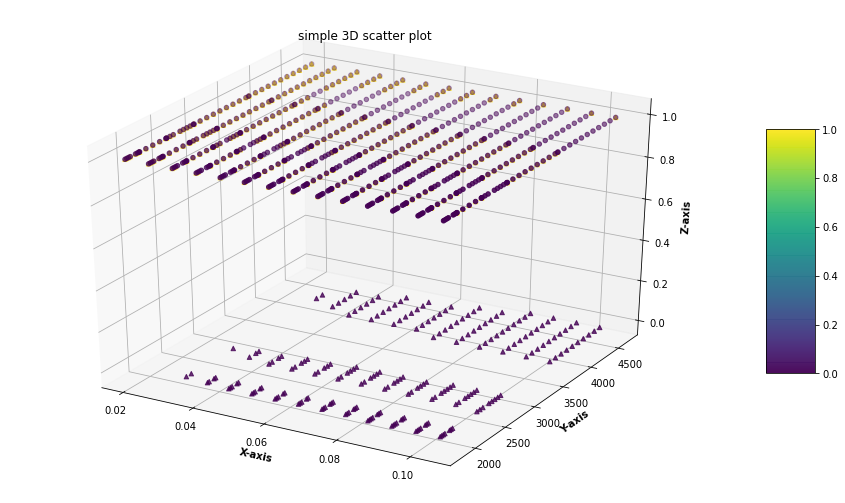

In [97]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
z = df['Class']
x = df['Depth']
y = df['Soeed']
z_pred=grid.predict(df.iloc[:,:2].to_numpy())
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)


# Creating color map
# my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = z,
					marker ='^')
ax.scatter3D(x,y,z_pred,c=z_pred)
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()


In [98]:
# h=0.02
# df2=pd.read_excel('/content/drive/MyDrive/Og_TrainingData_600.xlsx')
# df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
# df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
# df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
# df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True)
# y=pd.DataFrame(data=df2['Class'])
# X=df2.drop(columns=['Class'])

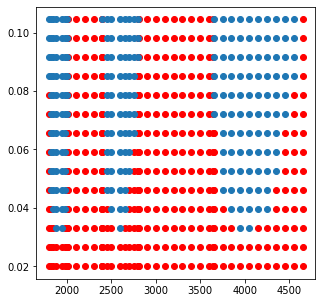

In [99]:
X1=[]
Y1=[]
X2=[]
Y2=[]
for i in range(616):
  if df2.iloc[i,2]==1.0:
    X1.append(df2.iloc[i,0])
    Y1.append(df2.iloc[i,1])
  else:
    X2.append(df2.iloc[i,0])
    Y2.append(df2.iloc[i,1])
plt.figure(figsize=[5,5])
plt.scatter(Y1,X1,c='red')
plt.scatter(Y2,X2)
X_1=[]
X_2=[]
Y_1=[]
Y_2=[]
pred=grid.predict(df2.iloc[:,:2].to_numpy())
for i in range(616):
  if pred[i]==1.0:
    X_1.append(df2.iloc[i,0])
    Y_1.append(df2.iloc[i,1])
  else:
    X_2.append(df2.iloc[i,0])
    Y_2.append(df2.iloc[i,1])
# plt.fill_between(X_1,Y_1)
# plt.fill_between(X_2,Y_2)
# h=0.02
# x_min= X.iloc[:, 0].min() - 1
# x_max= X.iloc[:, 0].max() + 1
# y_min= X.iloc[:, 1].min() - 1
# y_max = X.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()

In [100]:
# y = y.to_numpy()
# l=[]
# for i in y.tolist():
#   if i==1:
#     l.append('red')
#   else:
#     l.append('green')

In [101]:
# x_min= X.iloc[:, 0].min() - 1
# x_max= X.iloc[:, 0].max() + 1
# y_min= X.iloc[:, 1].min() - 1
# y_max = X.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# # Plot also the training points

# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=l, cmap=plt.cm.coolwarm)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())
# plt.title('SVC classifier with rbf kernel')


In [102]:
## Plotting
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

In [103]:
# Z= grid.predict(X_plot)
# Z = Z.reshape(xx.shape)
# ## Code for creating plots
# plt.figure(figsize=(15, 5))
# plt.subplot(121)
# plt.contourf(xx, yy, Z, alpha=0.3)
# plt.set_cmap("gist_rainbow") 
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('Support Vector Classifier with rbf kernel')
# plt.plot()

In [104]:
pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.anaconda.org/scipy-wheels-nightly/simple


In [105]:
pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
pip install scikit-learn inspection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement inspection (from versions: none)
ERROR: No matching distribution found for inspection


In [107]:
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets
# from sklearn.inspection import DecisionBoundaryDisplay


# # import some data to play with
# iris = datasets.load_iris()
# # Take the first two features. We could avoid this by using a two-dim dataset
# X = X_train
# y = y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# C = 10000.0  # SVM regularization parameter
# models = (
#     # svm.SVC(kernel="linear", C=C),
#     # svm.LinearSVC(C=C, max_iter=10000),
#     svm.SVC(kernel="rbf", gamma=10, C=C),
#     # svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
# )
# models = (clf.fit(X, y) for clf in models)

# # title for the plots
# titles = (
#     "SVC with RBF kernel"
# )

# # Set-up 2x2 grid for plotting.
# fig, sub = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

# X0, X1 = X[:, 0], X[:, 1]

# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X,
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel=iris.feature_names[0],
#         ylabel=iris.feature_names[1],
#     )
#     ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)

# plt.show()

ImportError: ignored

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


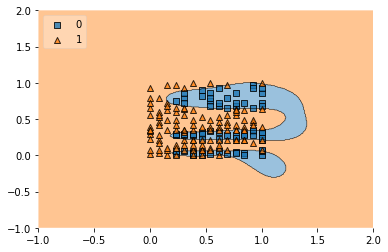

In [108]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf=grid, legend=2)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


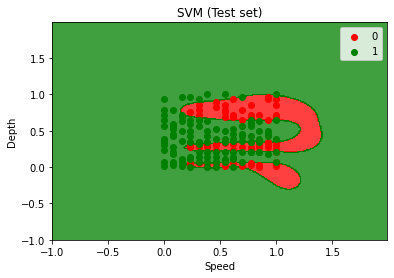

In [109]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, grid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Speed')
plt.ylabel('Depth')
plt.legend()
plt.show()